<a href="https://colab.research.google.com/github/devi777/News-Virality-MultiClass-Classification/blob/master/4_MultiClassClassificationModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bipolar Factory | Machine Learning

## Pre-Processing Data

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [0]:
# Importing the dataset
dataset = pd.read_csv('News3.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [0]:
dataset

,NAME,VPM,KOB,DPPV,DTS,BR,TP,TR,PB,PPD,AR,SEM,TFPM,DA,TARGET
0,YahooNews,175000000,2.800,4.34,4.600,39.2,8.3,0.228022,1.0,25,11,395,1.10,95,0
1,HuffingtonPost,110000000,1.200,1.50,2.260,48.1,20.8,0.500000,2.0,29,11655,4500,11.40,93,1
2,CNN,95000000,1.100,2.28,4.230,52.3,29.1,0.659864,1.0,30,72,417,47.20,95,0
3,NewYorkTimes,70000000,1.700,2.50,3.150,60.6,41.9,0.945824,1.0,28,77,555,44.70,95,0
4,FoxNews,65000000,0.550,2.59,5.210,46.3,22.2,0.500000,2.0,30,227,15,18.50,95,1
5,NBCNews,63000000,0.460,1.37,2.260,74.3,46.6,1.290859,1.0,30,507,1000,7.50,92,1
6,MailOnline,53000000,0.710,2.04,4.350,59.1,32.0,0.631164,2.0,30,271,16,16.40,94,1
7,TheGuardian,42000000,1.400,2.64,2.683,62.7,52.7,1.203196,1.0,30,119,50,8.20,95,0
8,ABCNews,36000000,0.482,1.39,2.330,70.8,45.2,1.231608,1.0,25,1047,1230,0.05,93,0
9,TimesOfIndia,212000000,0.063,1.40,2.050,64.1,46.2,0.540351,0.5,26,18024,467,12.70,93,1


Since, we are not supposed to fit the models on each category, so we will not one-hot encode y this time. 

In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 4/13, random_state = 0)

In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Analyzing Data using Logistic Regression

As we know, logistic regression can't be run on multi-class classification without changing its standard parameters. If we keep the parameters standard, then the y has to be one hot encoded and predicted separately for each set, like we did in the previous notebook.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR) scheme if the ‘multi_class’ option is set to ‘ovr’, and uses the cross-entropy loss if the ‘multi_class’ option is set to ‘multinomial’. (Currently the ‘multinomial’ option is supported only by the ‘lbfgs’, ‘sag’, ‘saga’ and ‘newton-cg’ solvers.)

So, we will use lbfgs solver in this dataset, and see how well it predicts y, i.e., the virality of the news and information websites. Let's start.

In [0]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver = 'lbfgs')
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [0]:
print('Test accuracy {:.2f}%'.format(classifier.score(X_test,y_test)*100))

Test accuracy 80.00%


That is so good. Wonderful. So, Logistic Regression fits beautifully on our randomly initialised dataset. I am focussing on our dataset being randomly initaliazed because if the model can perform this well on this dataset, then it can perform even better if the dataset had more training examples with the correct y values. It might be possible that the y values I predicted are correct as well, but that is pure luck. And ML doesn't work on pure luck :)

Now, let's move ahead and make the confusion matrix.

In [0]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1 1 0]
 [0 2 0]
 [0 0 1]]


In [0]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

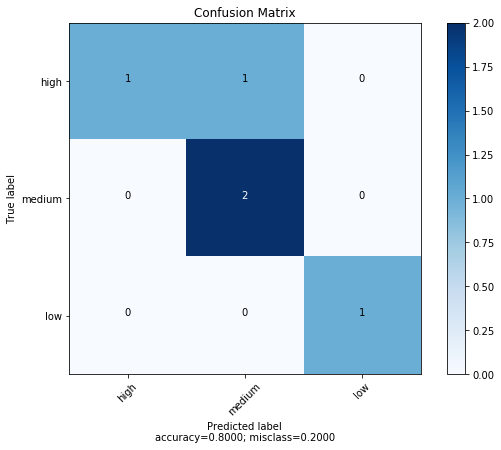

In [0]:
plot_confusion_matrix(cm = cm, normalize    = False, target_names = ['high', 'medium', 'low'],
                      title        = "Confusion Matrix")

So, it calculated 4/5 examples correctly. Great. I am happy.
Let's try applying KNN, i.e., K-Nearest Neighbors Classifier to every data now.

## Analyzing Data using KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred = classifier.predict(X_test)

In [0]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1 1 0]
 [2 0 0]
 [0 1 0]]


In [0]:
print('Test accuracy {:.2f}%'.format(classifier.score(X_test,y_test)*100))

Test accuracy 20.00%


Oops, not that good. Let's try changing the parameters a little.

In [0]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
y_pred = classifier.predict(X_test)

In [0]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2 0 0]
 [2 0 0]
 [0 0 1]]


In [0]:
print('Test accuracy {:.2f}%'.format(classifier.score(X_test,y_test)*100))

Test accuracy 60.00%


That's better.

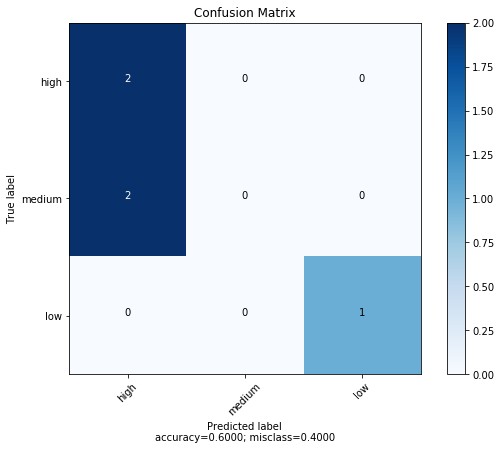

In [0]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

plot_confusion_matrix(cm = cm, normalize    = False, target_names = ['high', 'medium', 'low'],
                      title= "Confusion Matrix")

In [0]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=4,metric='minkowski',p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [0]:
y_pred = classifier.predict(X_test)

In [0]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1 1 0]
 [2 0 0]
 [0 1 0]]


In [0]:
print('Test accuracy {:.2f}%'.format(classifier.score(X_test,y_test)*100))

Test accuracy 20.00%


Nope. 3 neighbors is the best. So, we got a accuracy of 60%, 3 out of 5. Not bad. Let's try the others. 

## Analyzing Data using SVM

So, in SVM, we find the boundary line which has the maximum equidistant margin between the 2 closest points of the different classes.

In [0]:
from sklearn.svm import SVC
classifier = SVC(kernel='sigmoid',random_state=0)
classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
y_pred = classifier.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1 1 0]
 [1 1 0]
 [0 1 0]]


In [0]:
print('Test accuracy {:.2f}%'.format(classifier.score(X_test,y_test)*100))

Test accuracy 40.00%


Okay. let's try the others.

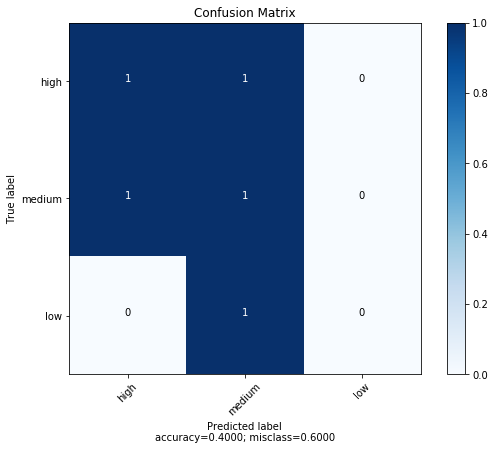

In [0]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

plot_confusion_matrix(cm = cm, normalize    = False, target_names = ['high', 'medium', 'low'],
                      title= "Confusion Matrix")

## Analyzing Data using Kernel SVM

Kernel SVM can handle non-linearity in data unlike SVM.

In [0]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', C = 3, verbose = 1).fit(X_train, y_train) 
classifier.fit(X_train,y_train)

[LibSVM][LibSVM]

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=1)

In [0]:
y_pred = classifier.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1 1 0]
 [0 2 0]
 [0 0 1]]


In [0]:
print('Test accuracy {:.2f}%'.format(classifier.score(X_test,y_test)*100))

Test accuracy 80.00%


That's more like it. Moving on to Naive Bayes.

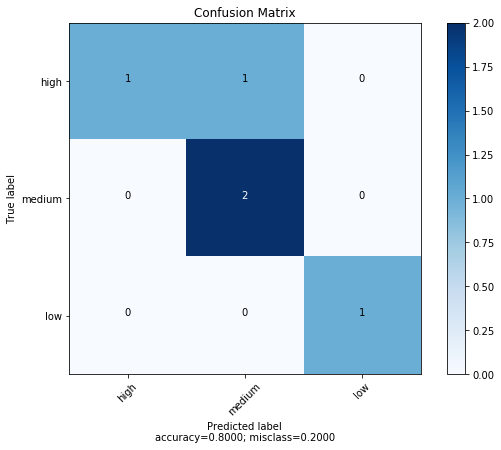

In [0]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

plot_confusion_matrix(cm = cm, normalize    = False, target_names = ['high', 'medium', 'low'],
                      title= "Confusion Matrix")

##  Analyzing Data using Naive Bayes

A Naive Bayes classifier is a probabilistic machine learning model that’s used for classification task. The crux of the classifier is based on the Bayes theorem.

In [0]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred = classifier.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1 1 0]
 [0 2 0]
 [0 1 0]]


In [0]:
print('Test accuracy {:.2f}%'.format(classifier.score(X_test,y_test)*100))

Test accuracy 60.00%


Not bad. It doesn't have any parameters. So, moving on.

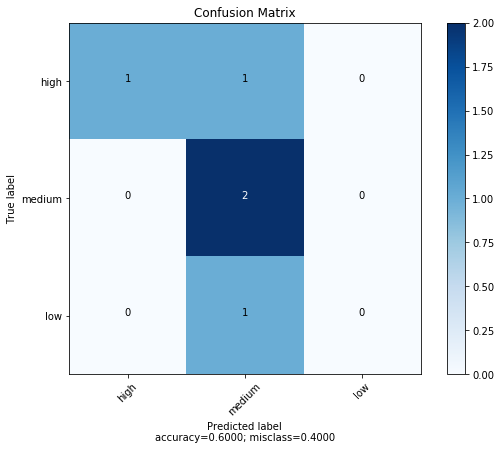

In [0]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

plot_confusion_matrix(cm = cm, normalize    = False, target_names = ['high', 'medium', 'low'],
                      title= "Confusion Matrix")

## Analyzing Data using Decision Tree 

In [0]:
# Fitting classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',
                                    random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [0]:
y_pred = classifier.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[0 2 0]
 [1 1 0]
 [0 0 1]]


In [0]:
print('Test accuracy {:.2f}%'.format(classifier.score(X_test,y_test)*100))

Test accuracy 40.00%


The problem with Decision Tree and Random Forest Classification is that they overfit the training set. They try to capture the points that lie among the opposite target points. Let's try better parameters.

In [0]:
# Fitting classifier to the Training set , Try 2
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes= 4, max_depth= 7, min_samples_leaf=2, 
                                    random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=4,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [0]:
y_pred = classifier.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[0 2 0]
 [1 1 0]
 [0 0 1]]


In [0]:
print('Test accuracy {:.2f}%'.format(classifier.score(X_test,y_test)*100))

Test accuracy 40.00%


Nope. Not getting good. Need to explore more about this one I guess.

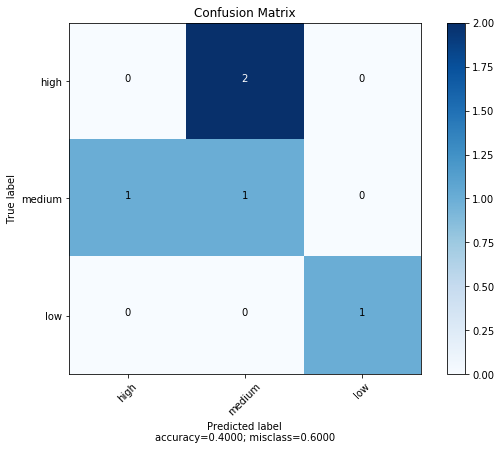

In [0]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

plot_confusion_matrix(cm = cm, normalize    = False, target_names = ['high', 'medium', 'low'],
                      title= "Confusion Matrix")

## Analyzing Data using Random Forest

In [0]:
# Fitting classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1,criterion='entropy',max_depth=4,random_state=0)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
y_pred = classifier.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1 1 0]
 [2 0 0]
 [0 1 0]]


In [0]:
print('Test accuracy {:.2f}%'.format(classifier.score(X_test,y_test)*100))

Test accuracy 20.00%


Nope, Not working good.

In [0]:
print('Test accuracy {:.2f}%'.format(classifier.score(X_train,y_train)*100))

Test accuracy 88.89%


Similiar to decision tree. Keeps overfitting.

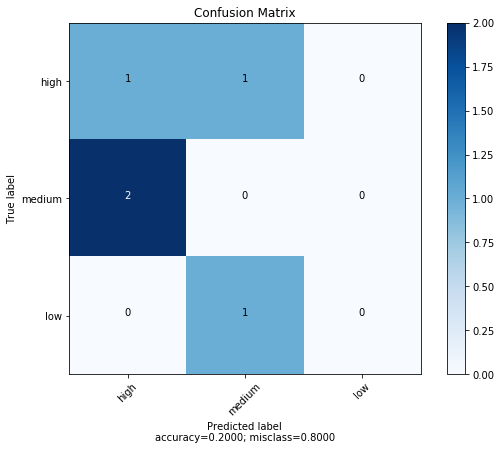

In [0]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

plot_confusion_matrix(cm = cm, normalize    = False, target_names = ['high', 'medium', 'low'],
                      title= "Confusion Matrix")

So, the best model that fitted the dataset and predicted correct values was Logistic Regression and Kernel SVM, with a good 80% performance shown by the models on the data. 

So, That marks the end of the notebook and the end of this project. It was a good problem statement, I worked 4 days straight on it and enjoyed a lot as well. And I hope this assignment solution fits the problem statement and the criteria of qualification as well. Thank you for giving me the opportunity. It was a good learning experience.

Looking forward to your response.

Regards

Devansh Kaushik